# Linear Regression

Linear regression Linear regression  is a statistical method used in machine learning and statistics to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the independent variables (features) and the dependent variable (target).


The general form of a linear regression model with one independent variable is:

\( y = mx + b \).

where:

        y is the dependent variable.

        x is the independent variable.

        m is the slope of the line.

        b is the y-intercept.

For multiple independent variables, the equation becomes a hyperplane:

\( y = b + m1.x1 + m2.x2 +.... + m_n.x_n \)


# Linear Regression Equation (Simple)

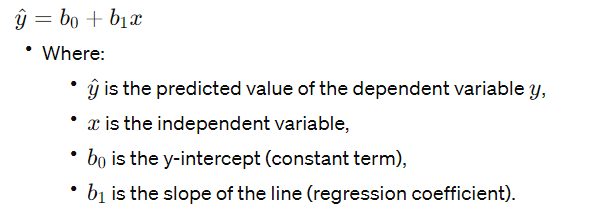
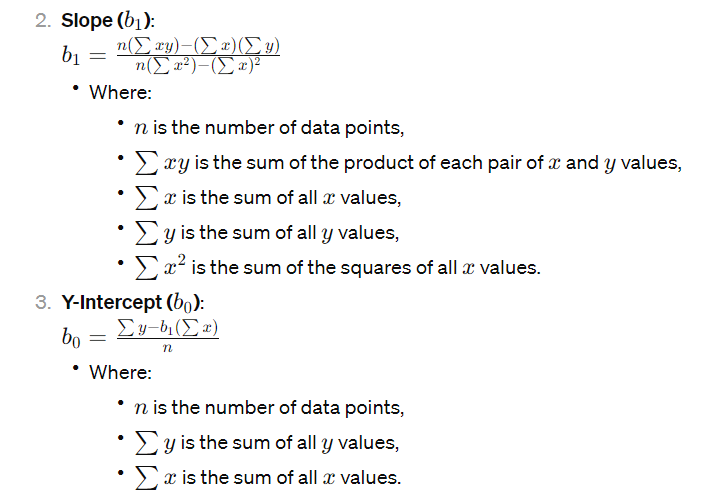
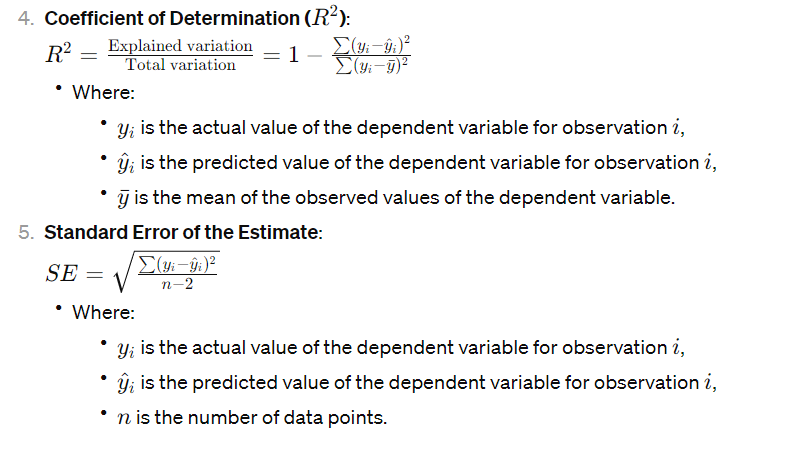

# Building Linear Regression Model using `sklearn`

Below mentioned are the steps to be followed:
1. Load the data
2. Data Preparation - train-test Split, Normalisation or Rescaling
3. Training the Model
4. Prediction
5. Evaluation

### 1. Load the data

In [68]:
# Importing the required libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [71]:
# read the data 
df = pd.read_csv('data/student_scores.csv')

#show top 5 records
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [72]:
# find the dimensions of dataframe
print(df.shape)

(25, 2)


### 2. Data Preparation

In [76]:
target = df['Scores']
data = df[['Hours']]

In [77]:
data

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [7]:
print(target)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [8]:
# split the data into train and split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17, 1) (17,)
(8, 1) (8,)


In [9]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


In [10]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


### 3. Training the model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print('y intercept: ',regressor.intercept_)
print('slope: ',regressor.coef_)

y intercept:  2.3708153823418883
slope:  [9.78856669]


### 4. Prediction

In [13]:
y_test_pred = regressor.predict(X_test)

In [14]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


<Axes: xlabel='Scores', ylabel='Count'>

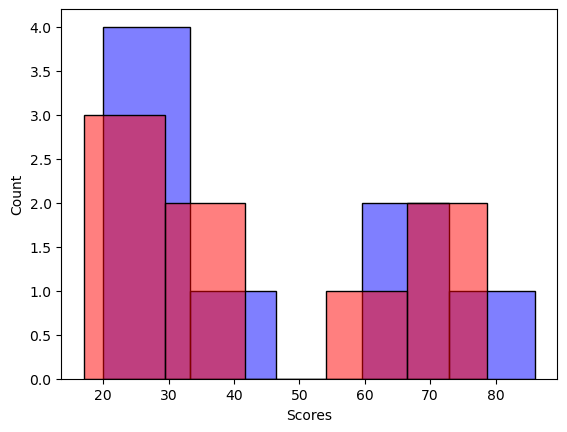

In [15]:
import seaborn as sns

sns.histplot(y_test, color='blue', alpha=0.5, bins=5)
sns.histplot(y_test_pred, color='red', alpha=0.5, bins=5)

### 5. Evaluation

In [16]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.419727808027651
Mean Squared Error:  22.965097212700428
Root Mean Squared Error:  4.7921912746363144


In [17]:
print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435257


# Building the complete model using `sklearn`!!

Below mentioned are the steps to be followed:
1. Load the data
2. Understand and Viz the data
3. Data Preparation - train-test Split, Normalisation or Rescaling
4. Training the Model
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation

### 1. Loading the Data

In [78]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Read the data
df = pd.read_csv('data/student_scores.csv')

### 2. Understanding and Visuallizing the data

In [80]:
# Show top 5 records
print("Top 5 records of the dataset:")
print(df.head())

Top 5 records of the dataset:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [81]:
# Find the dimensions of the dataframe
print("\nDimensions of the dataframe:")
print(df.shape)


Dimensions of the dataframe:
(25, 2)


In [82]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [83]:
print(df.columns)

Index(['Hours', 'Scores'], dtype='object')


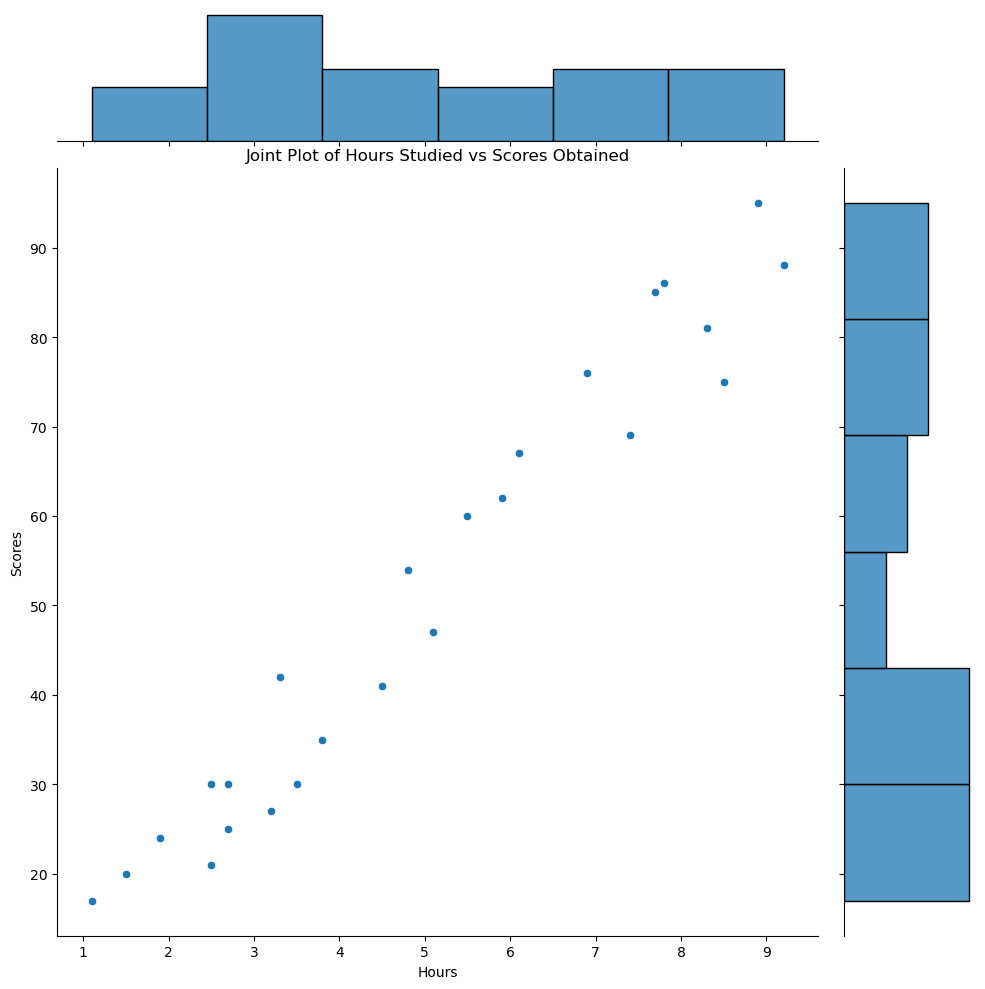

In [84]:
# Jointplot to visualize the relationship between 'Hours' and 'Scores' with increased size
sns.jointplot(x='Hours', y='Scores', data=df, kind='scatter', height=10)
plt.title('Joint Plot of Hours Studied vs Scores Obtained')
plt.show()
#Scatter Plot: Each point in the scatter plot represents an observation in your dataset, with the x-coordinate corresponding to the 'Hours' variable and the y-coordinate corresponding to the 'Scores' variable.

# Marginal Histograms: Along the top and right sides of the scatter plot, you'll find histograms (or kernel density plots) for each individual variable.

In [85]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


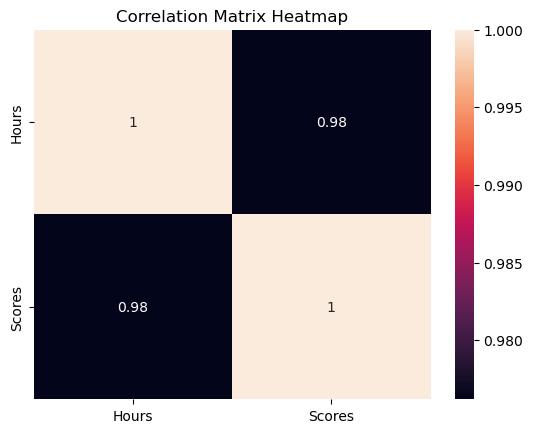

In [86]:
# Correlation matrix heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


**Positive Correlation:**

A correlation value close to 1 suggests a strong positive correlation.
Example: A correlation coefficient of 0.8 indicates a strong positive relationship.
No Correlation:

A correlation value close to 0 suggests no linear correlation.
Example: A correlation coefficient of 0.1 indicates a weak or negligible correlation.
Negative Correlation:

A correlation value close to -1 suggests a strong negative correlation.
Example: A correlation coefficient of -0.9 indicates a strong negative relationship.


### 3. Data Preparation


In [87]:
# Feature and Target Variable
X = df[['Hours']]
y = df['Scores']

In [88]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


In [89]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [93]:
X_train

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2
18,6.1
4,3.5
9,2.7


In [94]:
X_train_scaled

array([[ 0.61985283],
       [-1.73081981],
       [-0.10966627],
       [ 0.94408354],
       [-0.83918536],
       [ 1.18725657],
       [ 1.55201611],
       [ 0.29562212],
       [-0.75812769],
       [-1.0823584 ],
       [ 0.05244909],
       [-1.0823584 ],
       [ 1.26831424],
       [-1.16341607],
       [-0.23125279],
       [ 1.4304296 ],
       [-0.3528393 ]])

**Standardization** is a common preprocessing step in machine learning to ensure that all features have the same scale. This is important for algorithms that are sensitive to the scale of input features, such as support vector machines, k-nearest neighbors, and principal component analysis.

The formula for standardization is given by:

    Standardized Value = (Xᵢ - Mean) / Standard Deviation

Formula for Mean:

    Mean = Sum of(Xᵢ) / Number of Values

Formula for Standard Deviation:

    Standard Deviation = Square Root of [(Sum of (Xᵢ - Mean)²) / Number of Values]




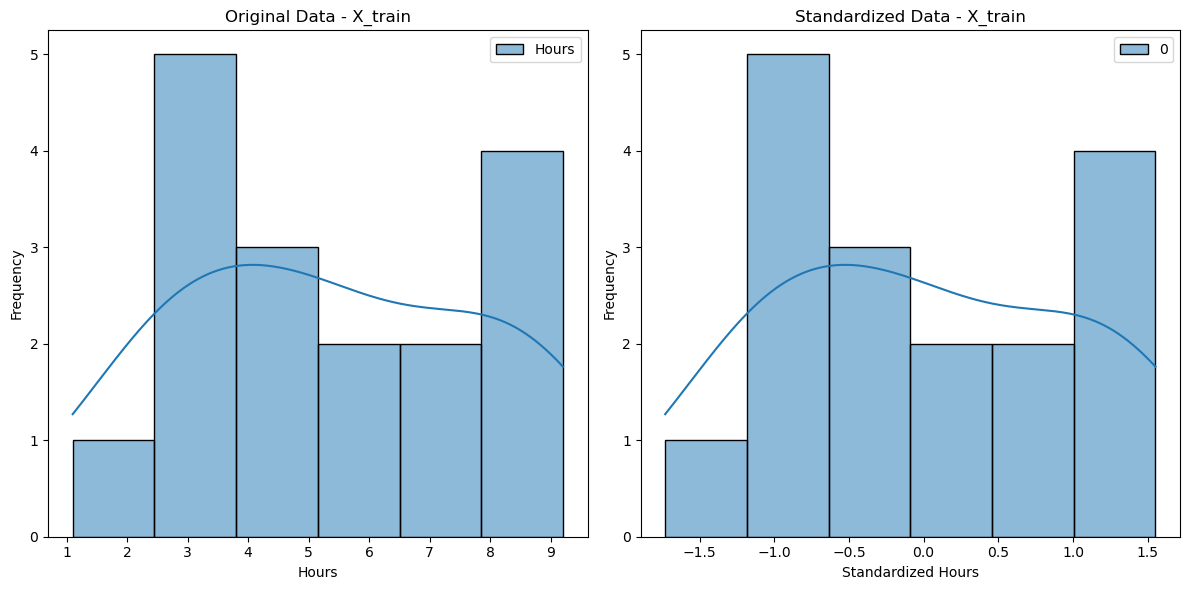

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(X_train, kde=True)
plt.title('Original Data - X_train')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Standardized Data
plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled, kde=True)
plt.title('Standardized Data - X_train')
plt.xlabel('Standardized Hours')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 4. Training

In [31]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
# Displaying the coefficients and intercept
print('\nModel Coefficients and Intercept:')
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)


Model Coefficients and Intercept:
Coefficients: [9.78856669]
Intercept: 2.3708153823418883


### 5. Making the Prediction

In [33]:
# Make predictions on the test set
y_test_pred = regressor.predict(X_test)

In [34]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(temp_df)

    Actual  Predicted
5       20  17.053665
2       27  33.694229
19      69  74.806209
16      30  26.842232
11      62  60.123359
22      35  39.567369
17      24  20.969092
24      86  78.721636


### 6. Evaluating the Algorithm

In [35]:
# Model Evaluation
from sklearn import metrics

print('\nModel Evaluation Metrics:')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))



Model Evaluation Metrics:
Mean Absolute Error:  4.419727808027651
Mean Squared Error:  22.965097212700428
Root Mean Squared Error:  4.7921912746363144


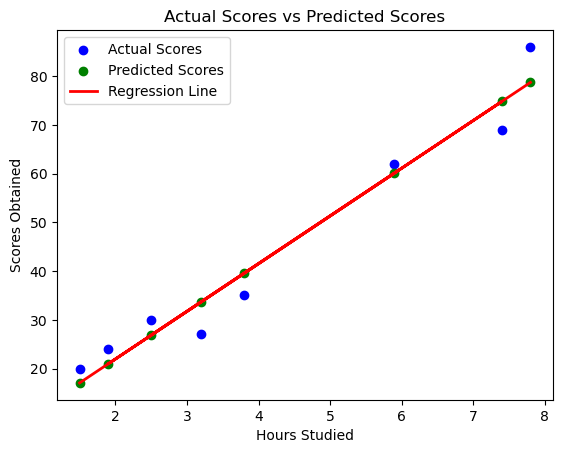

In [36]:
# Visualizing the Regression Line
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.scatter(X_test, y_test_pred, color='green', label='Predicted Scores')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Actual Scores vs Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()


In [37]:
# Cross-validation is a resampling technique used to evaluate machine learning models on a limited data sample.

# Cross-Validation
from sklearn.model_selection import cross_val_score

# Create a Linear Regression model
model = regressor

# Perform 5-fold cross-validation and use mean squared error as the scoring metric
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# The result is an array of scores for each fold
print('Cross-Validation Scores:', cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)

print(f'Mean CV Score: {mean_score}, Standard Deviation: {std_score}')
"""
estimator: The machine learning model or algorithm for which you want to perform cross-validation.

X: The feature matrix.

y: The target variable.

cv (optional): Determines the cross-validation splitting strategy. It can be an integer specifying the number of folds (e.g., 5 for 5-fold cross-validation) or a cross-validation splitter.

scoring (optional): The metric used to evaluate the performance of the model for each iteration of cross-validation. It can be a string (e.g., 'accuracy', 'mean_squared_error', etc.) or a custom scoring function.

n_jobs (optional): The number of CPU cores to use for cross-validation. Set to -1 to use all available cores.


"""

Cross-Validation Scores: [-51.95549224 -68.9781918  -18.44540665 -29.16935926 -37.12909925
 -24.99195148 -19.20799298 -20.59407497 -21.41511744 -62.36432207]
Mean CV Score: -35.425100814692485, Standard Deviation: 18.008935220094585


"\nestimator: The machine learning model or algorithm for which you want to perform cross-validation.\n\nX: The feature matrix.\n\ny: The target variable.\n\ncv (optional): Determines the cross-validation splitting strategy. It can be an integer specifying the number of folds (e.g., 5 for 5-fold cross-validation) or a cross-validation splitter.\n\nscoring (optional): The metric used to evaluate the performance of the model for each iteration of cross-validation. It can be a string (e.g., 'accuracy', 'mean_squared_error', etc.) or a custom scoring function.\n\nn_jobs (optional): The number of CPU cores to use for cross-validation. Set to -1 to use all available cores.\n\n\n"

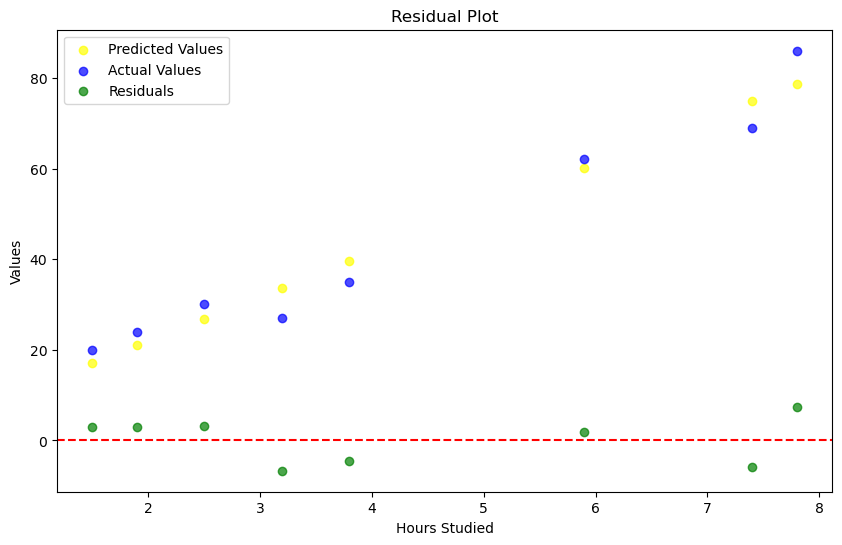

In [38]:
# Residual Plot for Model Evaluation
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))

# Scatter plot for predicted values (in yellow)
plt.scatter(X_test, y_test_pred, color='yellow', label='Predicted Values', alpha=0.7)

# Scatter plot for actual values (in blue)
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.7)

# Scatter plot for residuals (in green)
plt.scatter(X_test, residuals, color='green', label='Residuals', alpha=0.7)

# Title and labels
plt.title('Residual Plot')
plt.xlabel('Hours Studied')
plt.ylabel('Values')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
plt.legend()  # Show legend

plt.show()


Interpretation Guidelines Residual Plot:

If the residuals exhibit a random scatter around the y=0 line, it suggests that the model is performing well and making unbiased predictions.
If there is a pattern or trend in the residuals (e.g., a curve or a systematic increase/decrease), it indicates that the model might not be capturing all the information in the data.
Outliers in the residuals may indicate specific observations where the model performs poorly.
Overall, a good residual plot should exhibit:

Random scattering of residuals around the y=0 line.
No clear patterns or trends in the residuals.
Homoscedasticity, meaning that the spread of residuals should be roughly constant across all levels of the independent variable.

# Scenarios for Linear Regression:

Predictive Modeling: It can be used for predicting a continuous outcome variable based on one or more predictor variables.

Relationship Analysis: Linear regression helps in understanding and quantifying the relationships between variables.

Trend Analysis: It can be used to identify trends and patterns in data.

Economic Forecasting: In finance and economics, linear regression is often used for forecasting.

Risk Assessment: Linear regression can be used to assess the risk associated with certain variables.

# Pros of Linear Regression:



Interpretability: The results are easy to interpret, especially when there are only a few independent variables.

Computationally Inexpensive: Linear regression models are computationally less intensive compared to some other algorithms.

Simple and Fast: It's a simple and fast algorithm that serves as a good baseline model.

No Assumption of Normality: Linear regression does not assume that the independent variables are normally distributed.

# Cons of Linear Regression:

Assumption of Linearity: Linear regression assumes a linear relationship between the dependent and independent variables. If the relationship is nonlinear, the model might not perform well.

Sensitivity to Outliers: Linear regression is sensitive to outliers, and a single outlier can significantly influence the results.

Assumption of Independence: It assumes that the residuals (the differences between observed and predicted values) are independent, which might not always be the case.

Overfitting Issues: If the number of features is much larger than the number of observations, linear regression may suffer from overfitting.

Limited Expressiveness: Linear regression may not capture complex relationships in the data, especially when the relationship is nonlinear.

# Multi linear regression

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [42]:
# Load the dataset into a DataFrame
file_path = 'data/Startups.csv'
df = pd.read_csv(file_path)

In [43]:
# Check the first few rows of the dataset
print(df.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [44]:
# Check the summary statistics
print(df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [45]:
# Check for missing values
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64


In [46]:
# Correlation Analysis
correlation_matrix = df.corr()
print(correlation_matrix)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [47]:
# Correlation Analysis
correlation_matrix = df.corr()
print(correlation_matrix)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


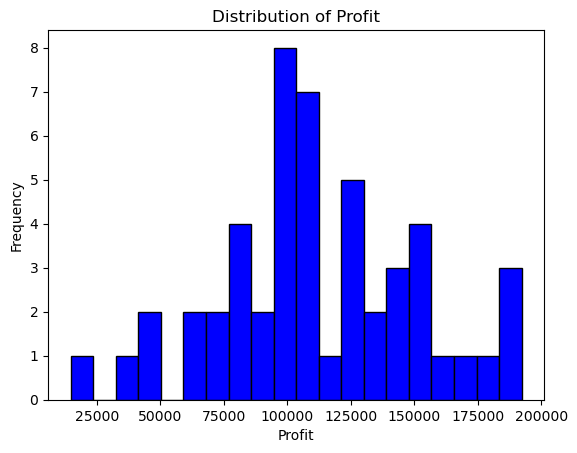

In [49]:
# Histogram for Target Variable
plt.hist(df['Profit'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [51]:
# Separate the features (X) and target variable (y)
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [59]:
    # Make predictions on the test set
y_pred = model.predict(X_test)


In [60]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 80926321.22295156


In [61]:
# Print the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [ 0.80377928 -0.06792917  0.03124155]
Intercept: 54071.87574599087


In [66]:
import pandas as pd

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame
print(comparison_df)


       Actual      Predicted
13  134307.35  126703.027165
39   81005.76   84894.750816
30   99937.59   98893.418160
45   64926.08   46501.708150
17  125370.37  129128.397344
48   35673.41   50992.694863
26  105733.54  109016.553658
25  107404.34  100878.464145
32   97427.84   97700.596386
19  122776.86  113106.152922


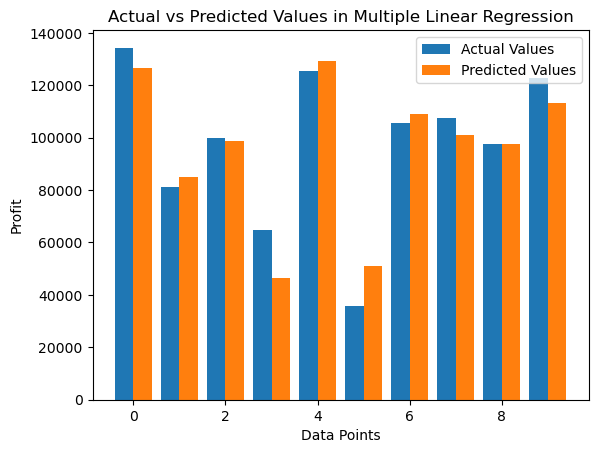

In [63]:
import numpy as np

# Create an array representing the indices of the data points
indices = np.arange(len(y_test))

# Bar plot for original values and predicted values
plt.bar(indices - 0.2, y_test, width=0.4, label='Actual Values')
plt.bar(indices + 0.2, y_pred, width=0.4, label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Values in Multiple Linear Regression')
plt.legend()
plt.show()


# Metrics

### Mean Absolute Error (MAE):



Measures the average absolute difference between the predicted and actual values.

MAE = (1/n) * Σ |yᵢ - ŷᵢ|


n is the number of data points.

yᵢ represents the actual value for the i-th data point.

ŷᵢ represents the predicted value for the i-th data point.

|.| denotes the absolute value.

Use Case: MAE is suitable when you want a simple, interpretable measure of the average absolute error. It treats all errors equally.

Limitations: MAE does not penalize large errors more heavily than small errors, which may not be suitable if large errors have a disproportionate impact on your application.

Interpretation: Smaller values are better.

Ideal Value: Ideally close to zero, but the definition of "close" depends on the scale of your target variable.

### Mean Squared Error (MSE)

Measures the average squared difference between the predicted and actual values.


MSE = (1/n) * Σ (yᵢ - ŷᵢ)²

n is the number of data points.

yᵢ represents the actual value for the i-th data point.

ŷᵢ represents the predicted value for the i-th data point.

|.| denotes the absolute value.

Use Case: MSE is commonly used when larger errors should be penalized more than smaller errors. It is sensitive to outliers.

Limitations: Since MSE involves squaring the errors, it can be sensitive to outliers, and the resulting value is in squared units of the target variable, making it less interpretable.

Interpretation: Smaller values are better. MSE is in the same units as the target variable, making it more interpretable.

Ideal Value: Ideally close to zero, but the definition of "close" depends on the scale of your target variable.


### Root Mean Squared Error (RMSE)

The square root of the MSE, providing a measure in the same units as the target variable.

RMSE = √((1/n) * Σ (yᵢ - ŷᵢ)²)

n is the number of data points.

yᵢ represents the actual value for the i-th data point.

ŷᵢ represents the predicted value for the i-th data point.

|.| denotes the absolute value.

√( ⋅ ) denotes taking the square root.

Use Case: RMSE is similar to MSE but provides a measure in the same units as the target variable, making it more interpretable.

Limitations: Like MSE, RMSE is sensitive to outliers.

Interpretation: Smaller values are better. RMSE is in the same units as the target variable, making it more interpretable.

Ideal Value: Ideally close to zero, but the definition of "close" depends on the scale of your target variable.


### R-squared (R2) Score:

Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
Values range from 0 to 1, with higher values indicating better model performance

R^2 = 1 - (MSE(model) / MSE(baseline))
MSE(model) is the mean squared error of the model.

MSE(baseline) is the mean squared error of a baseline model (often the mean of the target variable).

R^2  values range from 0 to 1, where higher values indicate a better fit of the model compared to a simple baseline.   

Use Case: R2 is useful for understanding the proportion of variance explained by the model. A higher R2 indicates a better fit.

Limitations: R2 does not tell you about the accuracy of predictions for individual data points. It may not be suitable if your primary concern is predicting individual values accurately.

Interpretation: Smaller values are better.

Ideal Value: As close to zero as possible, but the definition of "close" depends on the context.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data for demonstration
np.random.seed(42)
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
y = 2 * X1 + 3 * X2 + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.hstack((X1, X2)), y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the hyperplane in a 3D interactive plot using Plotly
fig = go.Figure()

# Scatter plot for the training data
fig.add_trace(go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train.flatten(), mode='markers', name='Training Data'))

# Scatter plot for the test data
fig.add_trace(go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_test.flatten(), mode='markers', name='Test Data'))

# Hyperplane plot
x_range = np.linspace(X1.min(), X1.max(), 10)
y_range = np.linspace(X2.min(), X2.max(), 10)
x_plane, y_plane = np.meshgrid(x_range, y_range)
z_plane = model.coef_[0, 0] * x_plane + model.coef_[0, 1] * y_plane + model.intercept_

fig.add_trace(go.Surface(x=x_plane, y=y_plane, z=z_plane, name='Hyperplane'))

# Set layout
fig.update_layout(scene=dict(
                    xaxis=dict(title='X1'),
                    yaxis=dict(title='X2'),
                    zaxis=dict(title='Y')
                ))

# Show the plot
fig.show()


Mean Squared Error: 0.6664320988651895
